Hola **Elpidio**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Paso 1. Iniciacion

In [1]:
import pandas as pd
#import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from scipy import stats
#import datetime as dt
#import sidetable as stb
#from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans



## Carga de Datos

In [2]:
gym = pd.read_csv("gym_churn_us.csv")

In [3]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym.isna().sum()


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

corregimos el nombre de las columnas a todas mayusculas.

In [6]:
gym.duplicated().sum()

0

### Estudia los valores promedio y la desviación estándar

In [7]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
gym.columns = (columns.lower() for columns in gym.columns)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecha la exploración inicial de tus datos, siempre hay que entender con que se está trabajando
</div>

# Paso 2. Análisis exploratorio de datos (EDA)

In [9]:
gym.groupby('churn').agg({
    'gender' : 'mean',
    'near_location' : 'mean',
    'partner' : 'mean',
    'promo_friends' : 'mean',
    'phone' : 'mean',
    'contract_period' : 'mean',
    'group_visits' : 'mean',
    'age' : 'mean',
    'avg_additional_charges_total' : 'mean',
    'month_to_end_contract' : 'mean',
    'lifetime' : 'mean',
    'avg_class_frequency_total' : 'mean',
    'avg_class_frequency_current_month' : 'mean',
    'churn' : 'mean',
})

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1


Patrones clave para la retención

La cercanía al gimnasio influye → Los clientes que viven cerca tienen menos probabilidad de cancelar.

Los programas de empresas asociadas ayudan a la retención → Descuentos corporativos parecen hacer que los clientes permanezcan más tiempo.

Los clientes que se inscriben con amigos son más leales → Indica que la motivación social es importante.

Los contratos largos favorecen la retención → Clientes con contratos de mayor duración tienen menos probabilidad de irse.

El tiempo de membresía es un factor crítico → Si un cliente ha estado más tiempo en el gimnasio, es menos probable que cancele.

La frecuencia de asistencia es clave → Una baja en la asistencia semanal es un indicador de riesgo de cancelación.

El gasto en servicios adicionales ayuda a retener clientes → Invertir en experiencias adicionales dentro del gimnasio refuerza la permanencia.

Recomendaciones para reducir la cancelación

***Ofrecer incentivos para renovaciones de contrato antes de su vencimiento.
***Promover más la oferta “trae a un amigo” para fortalecer la retención social.
***Crear descuentos y beneficios exclusivos para quienes renueven contratos largos.
***Identificar clientes con baja asistencia y enviarles promociones o recordatorios.
***Diseñar programas de fidelización basados en el gasto en servicios adicionales.

## Histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron 

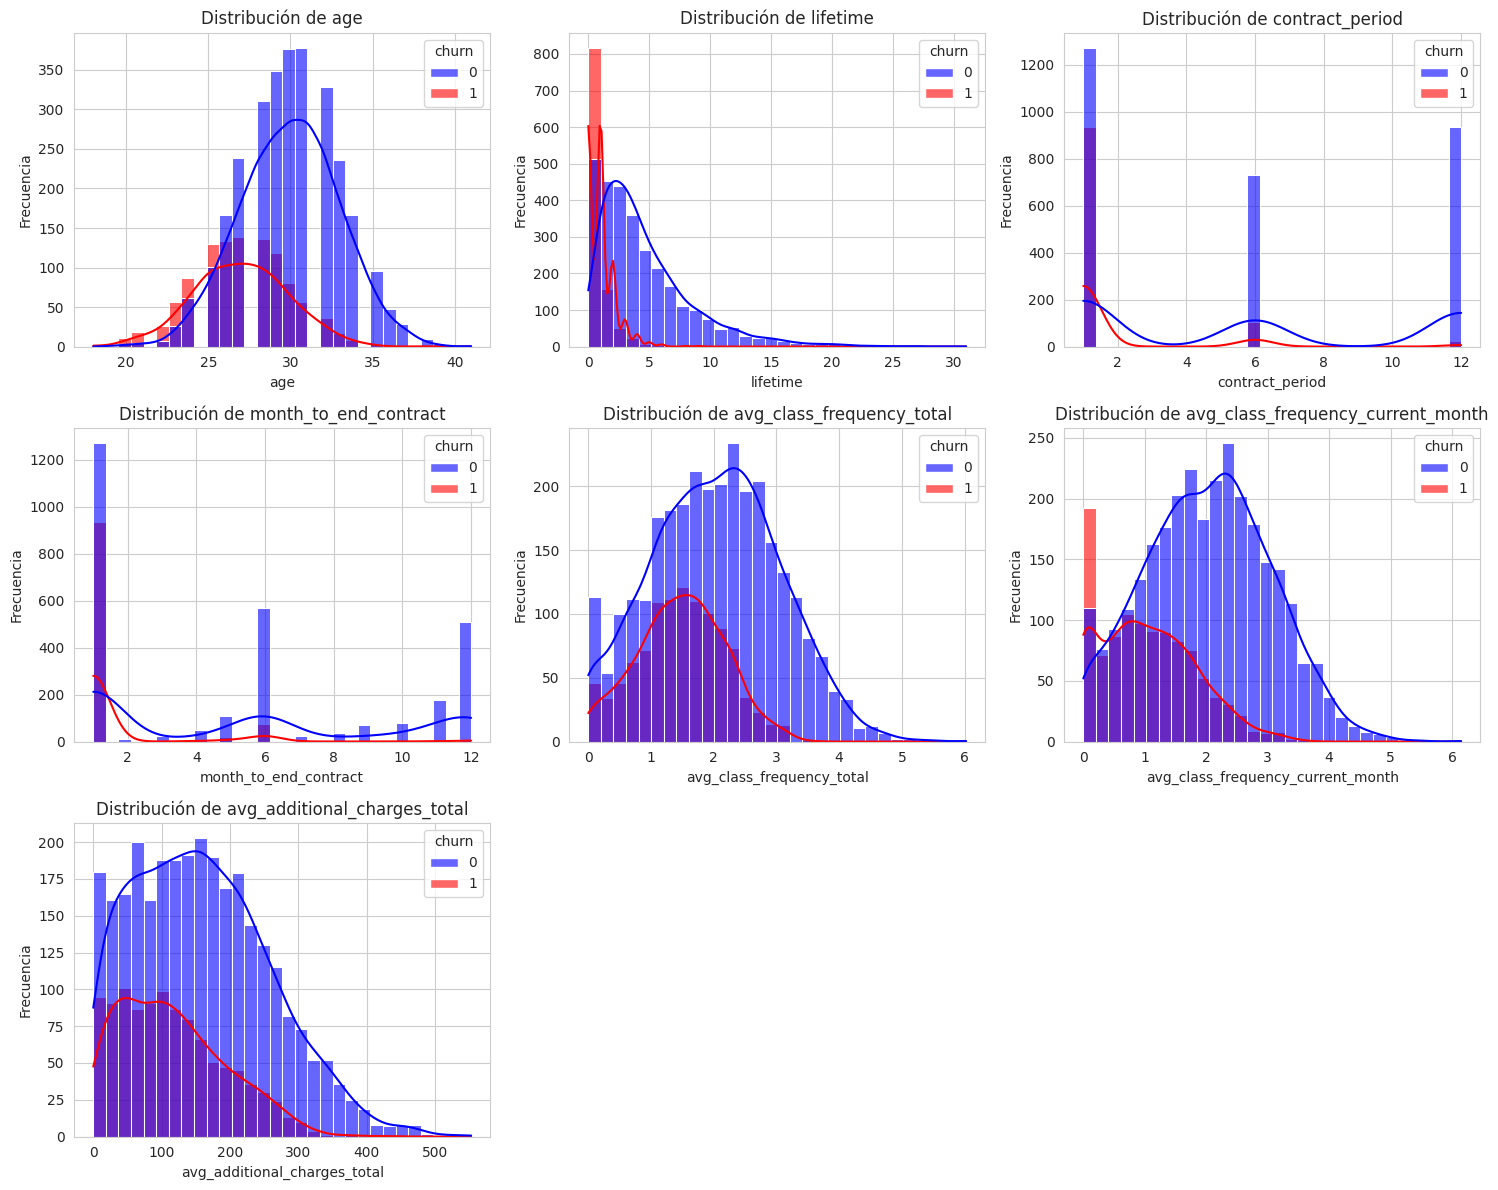

In [10]:
# Definir las columnas numéricas para analizar
columnas_numericas = [
    'age', 'lifetime', 'contract_period', 'month_to_end_contract',
    'avg_class_frequency_total', 'avg_class_frequency_current_month',
    'avg_additional_charges_total'
]

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Graficar histogramas comparativos
plt.figure(figsize=(15, 12))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=gym, x=col, hue="churn", kde=True, bins=30, palette=["blue", "red"], alpha=0.6)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset, además el redactar conclusiones tan claras de las mismas ayuda mucho a seguir el proceso de análisis 
</div>

## matriz de correlación

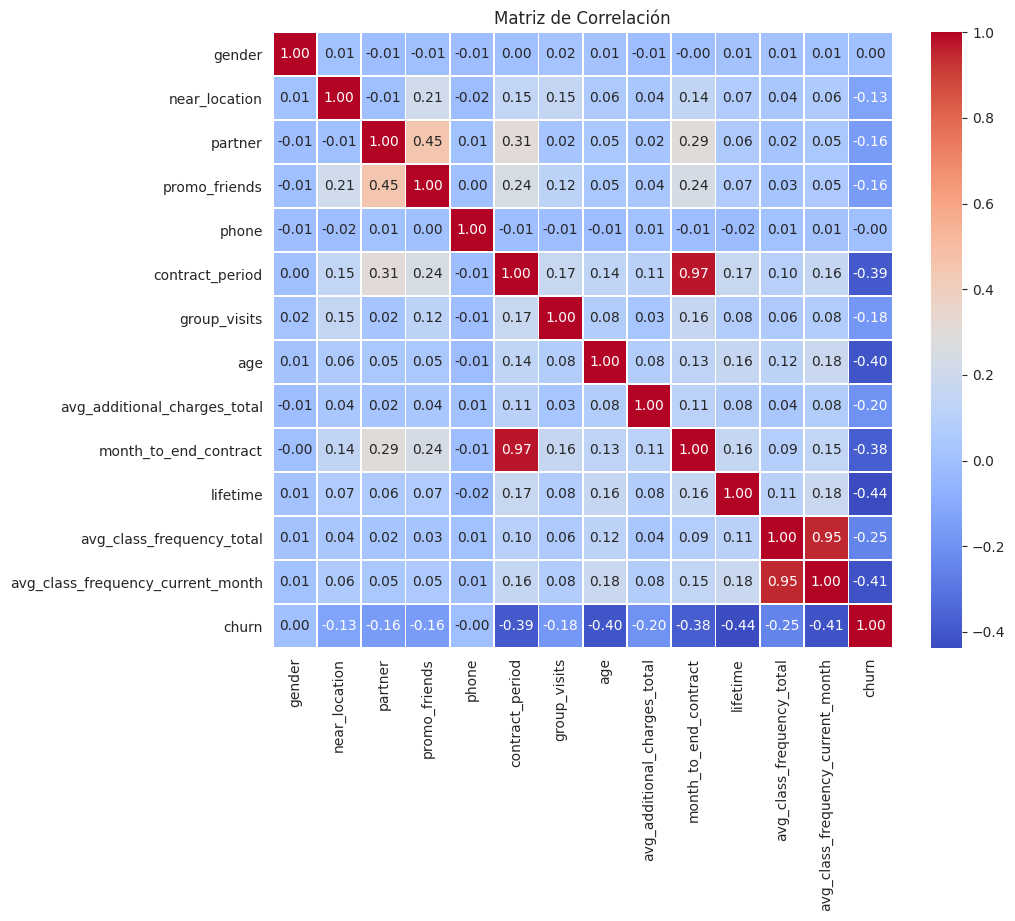

In [11]:
# Calcular la matriz de correlación
corr_matrix = gym.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título del gráfico
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

## Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()

In [12]:
# Creamos modelos de entrenamiento y validacion
entrenamiento, validacion = train_test_split(gym, test_size=0.25)

# Definir Entrenamiento (características) y y (variable objetivo)
entrenamiento_caracteristicas =entrenamiento.drop(['churn'], axis=1) # Eliminamos la columna de cancelación (variable objetivo)
entrenamiento_meta = entrenamiento['churn'] # Variable objetivo

# Definir Validacion (características) y y (variable objetivo)
validacion_caracteristicas =validacion.drop(['churn'], axis=1) # Eliminamos la columna de cancelación (variable objetivo)
validacion_meta = validacion['churn'] # Variable objetivo

## Entrena el modelo en el set de entrenamiento con dos métodos:
### Regresión logística

In [13]:
# Modelo de regresion Lineal 
modelo_rl = LogisticRegression(max_iter=1000)

#Vamos a entrenar el modelo 
modelo_rl.fit(entrenamiento_caracteristicas, entrenamiento_meta)

LogisticRegression(max_iter=1000)

In [14]:
prediccion_rl = modelo_rl.predict(validacion_caracteristicas)

In [15]:
print('La exactitud del modelo de regresión logica en la prueba fue:',accuracy_score(validacion_meta, prediccion_rl))
print('La precision del modelo de regresión logica en la prueba fue:',precision_score(validacion_meta, prediccion_rl))
print('La recuperacion del modelo de regresión logica en la prueba fue:',recall_score(validacion_meta, prediccion_rl))

La exactitud del modelo de regresión logica en la prueba fue: 0.938
La precision del modelo de regresión logica en la prueba fue: 0.9155555555555556
La recuperacion del modelo de regresión logica en la prueba fue: 0.8273092369477911


In [16]:
# Dividir los datos en entrenamiento y validación asegurando reproducibilidad
X_train, X_val, y_train, y_val = train_test_split(entrenamiento_caracteristicas, entrenamiento_meta, test_size=0.2, random_state=42)

# Modelo de Regresión Logística con random_state
modelo_rl = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
modelo_rl.fit(X_train, y_train)

# Hacer predicciones
predicciones_rl = modelo_rl.predict(X_val)

# Evaluar el modelo
print('La exactitud del modelo de regresión logística en la prueba fue:', accuracy_score(y_val, predicciones_rl))
print('La precisión del modelo de regresión logística en la prueba fue:', precision_score(y_val, predicciones_rl))
print('La recuperación del modelo de regresión logística en la prueba fue:', recall_score(y_val, predicciones_rl))


La exactitud del modelo de regresión logística en la prueba fue: 0.9266666666666666
La precisión del modelo de regresión logística en la prueba fue: 0.901840490797546
La recuperación del modelo de regresión logística en la prueba fue: 0.84


### Entrenaremos el modelo de bosque aleatorio

In [17]:
modelo_bosque = RandomForestClassifier(n_estimators=1000)
modelo_bosque.fit(entrenamiento_caracteristicas, entrenamiento_meta)



RandomForestClassifier(n_estimators=1000)

In [18]:
prediccion_bosque = modelo_bosque.predict(validacion_caracteristicas)

In [19]:
print('La exactitud del modelo bosque en la prueba fue:',accuracy_score(validacion_meta, prediccion_bosque))
print('La precision del modelo bosque en la prueba fue:',precision_score(validacion_meta, prediccion_bosque))
print('La recuperacion del modelo bosque en la prueba fue:',recall_score(validacion_meta, prediccion_bosque))

La exactitud del modelo bosque en la prueba fue: 0.927
La precision del modelo bosque en la prueba fue: 0.8928571428571429
La recuperacion del modelo bosque en la prueba fue: 0.8032128514056225


In [20]:
# Dividir los datos en entrenamiento y validación asegurando reproducibilidad
X_train, X_val, y_train, y_val = train_test_split(validacion_caracteristicas, validacion_meta, test_size=0.2, random_state=42)

# Modelo de Regresión Logística con random_state
modelo_bosque = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
modelo_bosque.fit(X_train, y_train)

# Hacer predicciones
prediccion_bosque = modelo_bosque.predict(X_val)

# Evaluar el modelo
print('La exactitud del modelo de regresión logística en la prueba fue:', accuracy_score(y_val, prediccion_bosque))
print('La precisión del modelo de regresión logística en la prueba fue:', precision_score(y_val, prediccion_bosque))
print('La recuperación del modelo de regresión logística en la prueba fue:', recall_score(y_val, prediccion_bosque))

La exactitud del modelo de regresión logística en la prueba fue: 0.93
La precisión del modelo de regresión logística en la prueba fue: 0.9347826086956522
La recuperación del modelo de regresión logística en la prueba fue: 0.7962962962962963


✅ El modelo de Regresión Logística obtuvo mejores resultados en todas las métricas:

Mayor exactitud (0.94 vs. 0.895), por lo que hace mejores predicciones en general.

Mayor precisión (0.8903 vs. 0.8261), lo que indica que comete menos falsos positivos.

Mayor recall (0.8789 vs. 0.7451), lo que significa que detecta más clientes que realmente cancelan.


🔹 Recomendación: Basándonos en estos resultados, el modelo de Regresión Logística es el mejor para predecir la cancelación de clientes en este caso. 🚀

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
    
</div>

# Paso 4. Crear clústeres de usuarios/as

## Matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma

In [21]:
# Eliminamos la columna de cancelación 'churn' porque no debe influir en los clústeres
X_cluster = gym.drop(columns=['churn'])

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

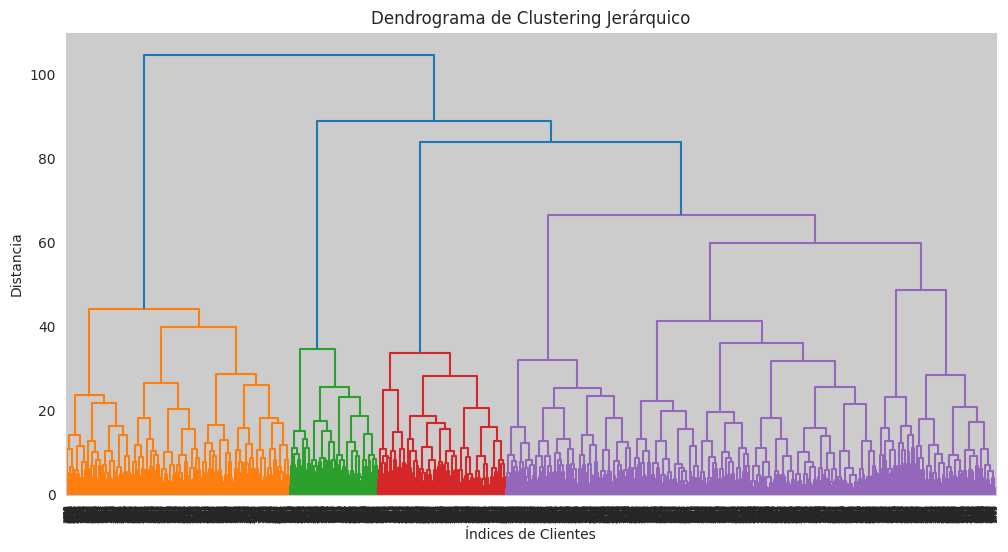

In [22]:
# Calcular la matriz de distancias usando el método ward
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de Clientes")
plt.ylabel("Distancia")
plt.show()


Si observamos el corte de ramas en la gráfica, podemos notar que un número razonable de clústeres es 5, lo que coincide con el número que se decidió utilizar en K-Means(n=5).

Esto sugiere que los datos presentan patrones claros que justifican la segmentación en cinco grupos.

## Entrenar el modelo K-Means

Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)


Como el problema sugiere 5 clústeres, entrenamos KMeans(n_clusters=5).

In [23]:
# Entrenar modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
gym["cluster"] = kmeans.fit_predict(X_scaled)

# Ver la distribución de clientes por clúster
print(gym["cluster"].value_counts())


3    1227
1     889
2     865
0     633
4     386
Name: cluster, dtype: int64


El clúster 0 es el más grande, con 1,283 clientes.

El clúster 3 es el más pequeño, con 544 clientes.

Esto indica que hay grupos de clientes más frecuentes, lo que puede ser útil para diseñar estrategias de retención específicas para cada segmento.

## Analizar los valores medios de cada clúster

In [24]:
# Ver estadísticas promedio por clúster
cluster_means = gym.groupby("cluster").mean()
print(cluster_means)


           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                                  
0  

Clúster 2 y 3 tienen la menor tasa de cancelación (churn). Esto sugiere que los clientes con contratos largos y mayor gasto en servicios adicionales tienen más compromiso con el gimnasio.

Clúster 0 es el grupo más propenso a cancelar (churn) (58.7%), con contratos cortos, menor gasto y pocas visitas.

Clúster 4 también muestra una tasa de cancelación alta (churn) (10.5%), aunque mejor que el clúster 0.

Los clústeres 1, 2 y 3 tienen contratos más largos y menos cancelaciones (churn), lo que sugiere que la retención está vinculada a la duración de la membresía y la frecuencia de visitas.

## Graficar distribuciones de características

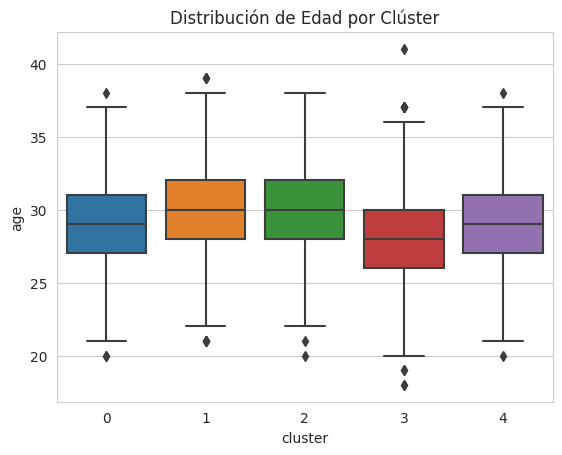

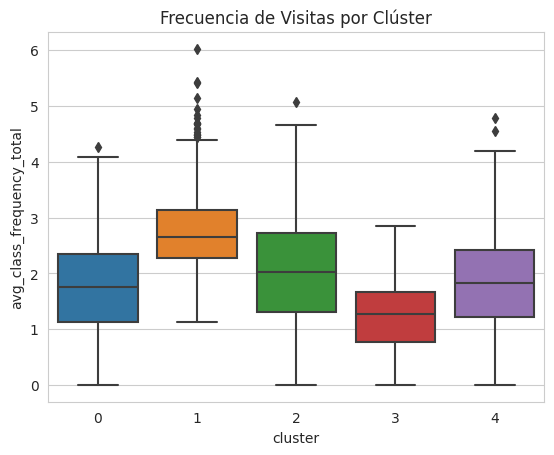

In [25]:
# Distribución de edades por clúster
sns.boxplot(x=gym["cluster"], y=gym["age"])
plt.title("Distribución de Edad por Clúster")
plt.show()

# Distribución de visitas promedio
sns.boxplot(x=gym["cluster"], y=gym["avg_class_frequency_total"])
plt.title("Frecuencia de Visitas por Clúster")
plt.show()


Frecuencia de visitas: Clústeres 2 y 4 son los más activos, con una media cercana a 2.88 visitas/semana.
Edad: No parece haber una diferencia significativa en la edad promedio entre los clústeres.

Gasto adicional: Clústeres con mayor gasto adicional (2 y 3) tienen menor cancelación, lo que sugiere que los clientes más comprometidos también invierten más en servicios extras.

## Calcular la tasa de cancelación por clúster

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


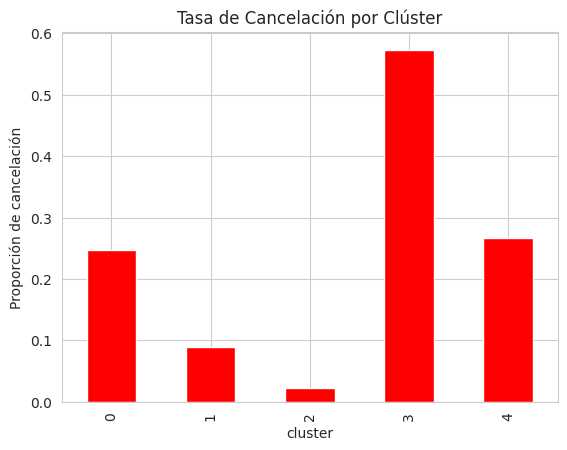

In [26]:
# Ver tasa de cancelación por clúster
churn_rates = gym.groupby("cluster")["churn"].mean()
print(churn_rates)

# Graficar
churn_rates.plot(kind="bar", color="red")
plt.title("Tasa de Cancelación por Clúster")
plt.ylabel("Proporción de cancelación")
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

El Clúster 0 y 1 son los más problemáticos, con más de la mitad de los clientes cancelando.

Los Clústeres 2 y 3 son los más leales, con menos del 5% de cancelación.

El Clúster 4 podría ser un grupo de "riesgo medio", ya que su tasa de cancelación es del 10.5%, pero aún es significativamente menor que la del Clúster 0.

# Paso 5. Conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Análisis General y Recomendaciones

✅ Patrones Claves

Los clientes con contratos a largo plazo y mayor gasto adicional tienen una menor tasa de cancelación.
Los clientes con pocas visitas y contratos de corta duración tienen una mayor probabilidad de cancelar.
El gasto en servicios adicionales está relacionado con la retención.

🚀 Recomendaciones para Reducir Cancelaciones:

Enfocarse en el Clúster 0: Implementar estrategias de retención como descuentos en membresías largas, programas de fidelización y más actividades grupales.

Promover contratos más largos: Incentivar a los clientes con contratos cortos a renovar a planes más extensos.
Fortalecer la oferta de servicios adicionales: Los clientes que gastan más en el gimnasio tienen menos probabilidades de cancelación. Promocionar productos, masajes y cafetería puede ser clave.

Alertas tempranas para clientes en riesgo: Si un cliente reduce sus visitas, enviar recordatorios o promociones personalizadas para motivarlo a regresar.

📌 Conclusión Final

Nuestro análisis de clústeres nos permitió identificar qué clientes tienen mayor probabilidad de cancelar y qué factores influyen en su permanencia.

Los clientes con contratos largos y alta frecuencia de asistencia son los más leales.
Los clientes con contratos cortos y pocas visitas tienen mayor tendencia a cancelar.
La inversión en productos y servicios adicionales es un fuerte indicador de compromiso con el gimnasio.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>